In [2]:
#always import pandas first

import pandas as pd


In [3]:
#read datafile from local library on comp

df = pd.read_csv('/Users/pratiksha/Downloads/messy_data.csv')

In [4]:
df

,Age,Income,Gender,Product,Quantity
0,56,59544.57663,Female,D,3
1,46,36399.18997,Female,NaN,1
2,32,57140.63881,Female,D,2
3,60,69554.91903,Male,C,5
4,25,53173.80518,Female,D,2
...,...,...,...,...,...
100,61,37341.55459,Male,D,5
101,55,35516.63492,Female,A,3
102,31,53254.05089,Male,B,2
103,21,NaN,Male,B,2


In [5]:
#read datafile from github

df = pd.read_csv("https://raw.githubusercontent.com/pdhull/schulich_data_science/main/messy_data.csv")

In [6]:
df

,Age,Income,Gender,Product,Quantity
0,56,59544.57663,Female,D,3
1,46,36399.18997,Female,NaN,1
2,32,57140.63881,Female,D,2
3,60,69554.91903,Male,C,5
4,25,53173.80518,Female,D,2
...,...,...,...,...,...
100,61,37341.55459,Male,D,5
101,55,35516.63492,Female,A,3
102,31,53254.05089,Male,B,2
103,21,NaN,Male,B,2


In [7]:
#always start with info basic

df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       105 non-null    int64  
 1   Income    94 non-null     float64
 2   Gender    105 non-null    object 
 3   Product   100 non-null    object 
 4   Quantity  105 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.2+ KB


In [8]:
#describe function always and see individual columns

df.describe(include='all')

,Age,Income,Gender,Product,Quantity
count,105.000000,94.000000,105,100,105.00000
unique,NaN,NaN,2,4,NaN
top,NaN,NaN,Female,D,NaN
freq,NaN,NaN,58,28,NaN
mean,42.076190,52867.862808,NaN,NaN,3.20000
std,15.940813,29896.579420,NaN,NaN,1.44382
min,18.000000,20901.331720,NaN,NaN,1.00000
25%,31.000000,37814.315255,NaN,NaN,2.00000
50%,41.000000,48760.369705,NaN,NaN,3.00000
75%,55.000000,61644.277868,NaN,NaN,5.00000


In [9]:
#for visualisation of the data we use seaborn, google seaborn library and check the gallery

import seaborn as sns 

<Axes: xlabel='Income', ylabel='Count'>

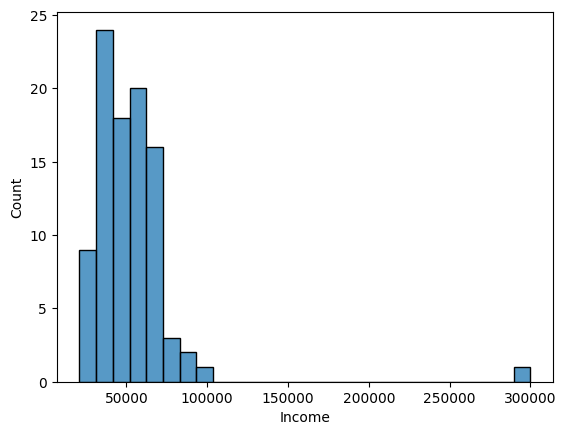

In [10]:
#income distribution of our dataset

sns.histplot(df['Income'])

<Axes: >

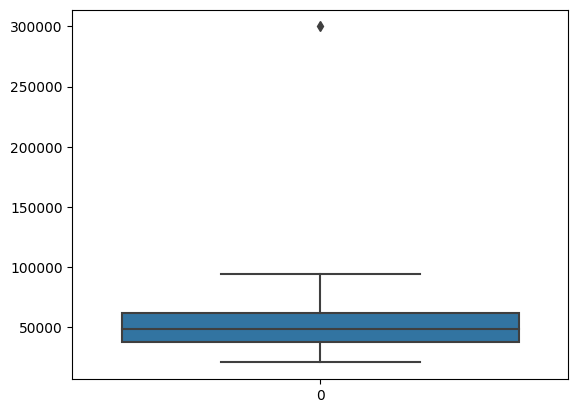

In [12]:
#make a boxplot min and max lines are there along with quartiles to segment data

sns.boxplot(df['Income'])

In [14]:
#write a statement to filter the data set and identify the outlier

df[df['Income'] > 250000] 

,Age,Income,Gender,Product,Quantity
99,61,300000.0,Male,B,4


In [15]:
#drop the outlier

df.drop(99, axis=0, inplace=True )

<Axes: >

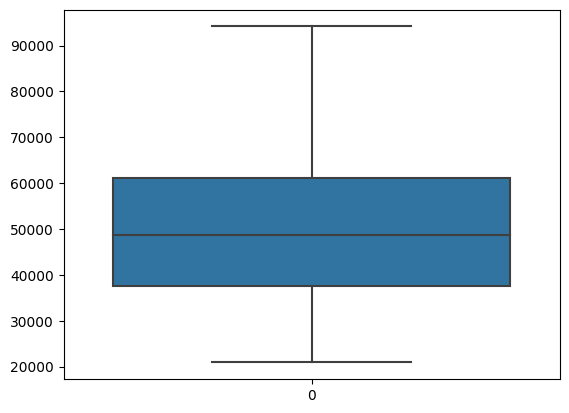

In [16]:
#now again create the boxplot after removing the outlier

sns.boxplot(df['Income'])

<Axes: xlabel='Income', ylabel='Count'>

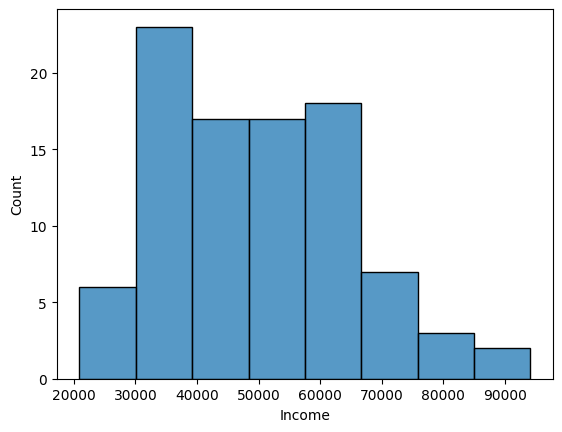

In [17]:
#again check for histogram

sns.histplot(df['Income'])

<Axes: xlabel='Gender', ylabel='Income'>

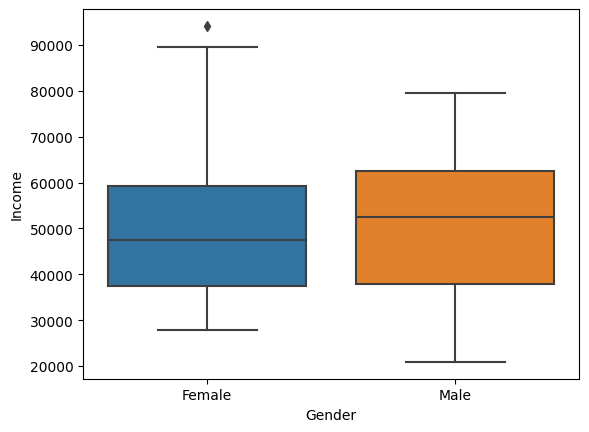

In [19]:
#for bivariate data in categorial continuous relationship

sns.boxplot(data = df, x = 'Gender', y = 'Income')

<Axes: xlabel='Age', ylabel='Income'>

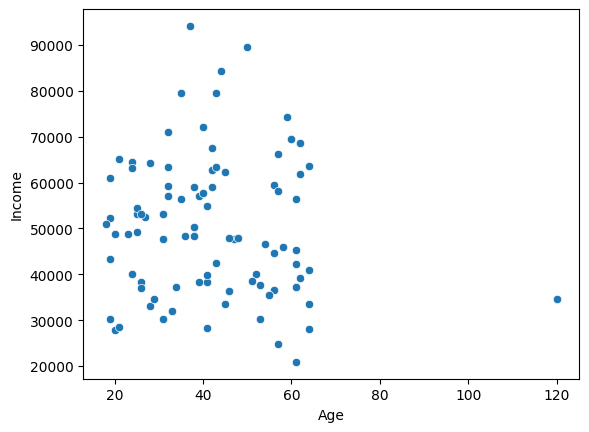

In [20]:
#for continuous and continuous relationship

sns.scatterplot(data = df, x = 'Age', y = 'Income')

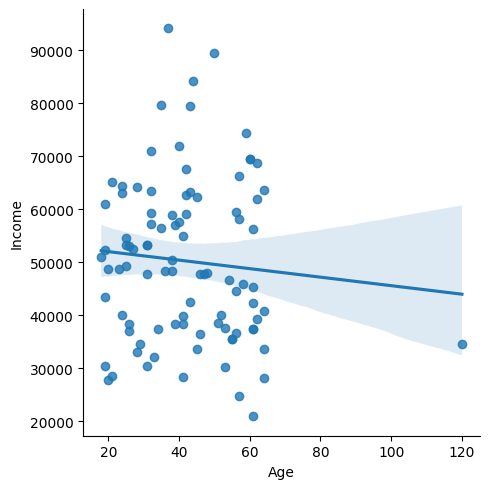

In [23]:
#use lmplot for the line of best fit

sns.lmplot(data = df, x = 'Age', y = 'Income', fit_reg= True)

In [24]:
#drop 120 as it is an outlier

df.drop(df[df['Age']==120].index, axis=0, inplace= True)

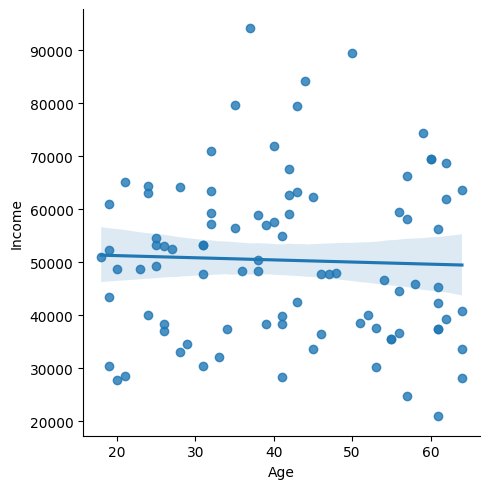

In [25]:
#now again make the lmplot

sns.lmplot(data = df, x = 'Age', y = 'Income', fit_reg= True)

In [26]:
#drop duplicates

df.drop_duplicates(inplace=True)

In [27]:
#cover missing value

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 0 to 97
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       98 non-null     int64  
 1   Income    88 non-null     float64
 2   Gender    98 non-null     object 
 3   Product   93 non-null     object 
 4   Quantity  98 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ KB


In [28]:
df['Product'] = df['Product'].fillna("Other")

In [30]:
df.groupby('Product')['Income'].mean()

Product
A        52599.570360
B        48693.364717
C        50742.171429
D        50377.772819
Other    47685.057048
Name: Income, dtype: float64

In [33]:
df['Income'] = df['Income'].fillna(df['Income'].mean())